In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
from pandas_datareader.data import DataReader
from datetime import datetime

In [4]:
from __future__ import division

In [5]:
tech_list = ['AAPL','AMZN','GOOG','MSFT']

In [6]:
end = datetime(2017, 5, 6)

In [7]:
start = datetime(2015, 1, 5)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'google',start,end) 

In [9]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,115.616435,116.588353,114.638065,115.651273,4.217590e+07
std,13.373421,13.310186,13.428767,13.383278,2.038015e+07
min,90.000000,91.670000,89.470000,90.340000,1.147592e+07
25%,107.030000,107.790000,105.640000,106.820000,2.795097e+07
50%,114.320000,115.570000,113.430000,114.480000,3.688625e+07
75%,126.090000,127.100000,125.060000,126.010000,4.989991e+07
max,147.540000,148.980000,146.840000,148.960000,1.614542e+08


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 589 entries, 2015-01-05 to 2017-05-05
Data columns (total 5 columns):
Open      589 non-null float64
High      589 non-null float64
Low       589 non-null float64
Close     589 non-null float64
Volume    589 non-null int64
dtypes: float64(4), int64(1)
memory usage: 27.6 KB


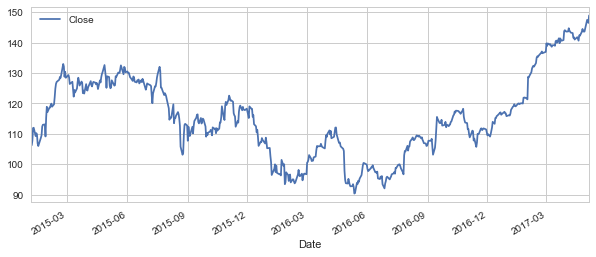

In [11]:
AAPL['Close'].plot(legend=True, figsize=(10,4))

In [12]:
GOOG.describe()

,Open,High,Low,Close,Volume
count,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,696.346401,701.774261,690.597504,696.383158,1.876507e+06
std,103.871408,103.977700,103.912328,104.021604,9.664514e+05
min,494.650000,495.980000,487.560000,492.550000,5.272230e+05
25%,616.640000,625.860000,609.600000,614.660000,1.304511e+06
50%,722.870000,728.130000,716.550000,721.110000,1.645844e+06
75%,775.000000,779.980000,770.050000,774.210000,2.129545e+06
max,933.540000,935.930000,925.200000,931.660000,1.116494e+07


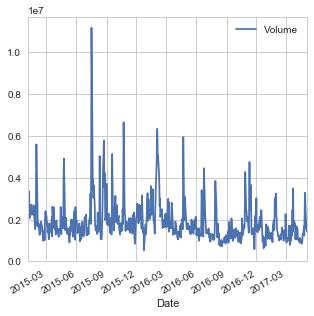

In [13]:
GOOG['Volume'].plot(legend=True,figsize=(5,5))

In [14]:
ma_day = [10,40,60]
for ma in ma_day:
    
    column_name = "MA for %s days"%(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Close'],ma)

C:\Users\manoj\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
C:\Users\manoj\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,center=False).mean()
  """
C:\Users\manoj\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
  """


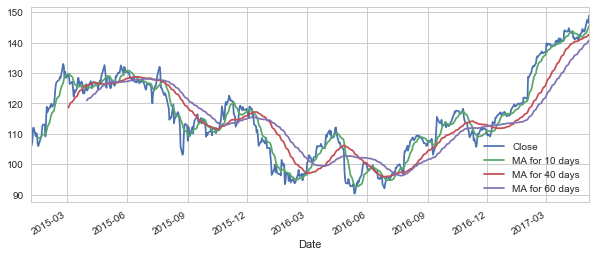

In [15]:
AAPL[['Close', 'MA for 10 days', 'MA for 40 days','MA for 60 days']].plot(figsize=(10,4))

In [16]:
GOOG["Daily Return"] = GOOG['Close'].pct_change()

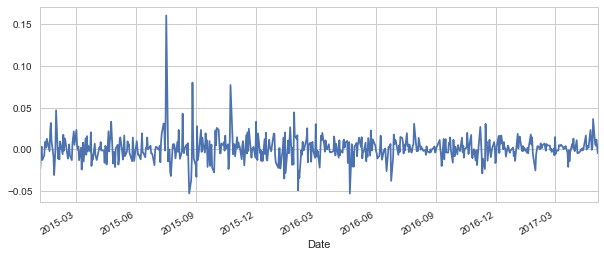

In [17]:
GOOG['Daily Return'].plot(figsize=(10,4))

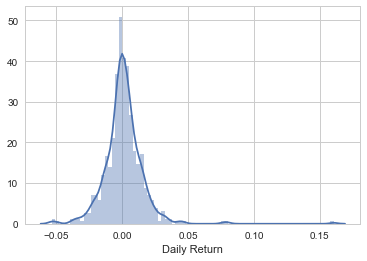

In [18]:
sns.distplot(GOOG['Daily Return'].dropna(), bins=80)

In [19]:
close_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'google',start,end)['Close']

In [20]:
close_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-01-05,106.25,302.19,513.87,46.32
2015-01-06,106.26,295.29,501.96,45.65
2015-01-07,107.75,298.42,501.10,46.23
2015-01-08,111.89,300.46,502.68,47.59
2015-01-09,112.01,296.93,496.17,47.19


In [21]:
rets = close_df.pct_change()

In [22]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-01-05,NaN,NaN,NaN,NaN
2015-01-06,0.000094,-0.022833,-0.023177,-0.014465
2015-01-07,0.014022,0.010600,-0.001713,0.012705
2015-01-08,0.038422,0.006836,0.003153,0.029418
2015-01-09,0.001072,-0.011749,-0.012951,-0.008405


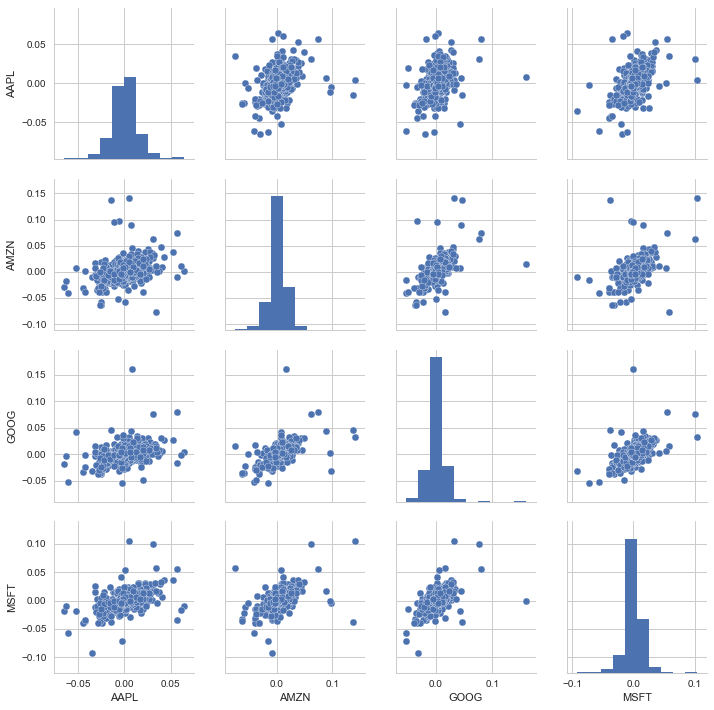

In [23]:
sns.pairplot(rets.dropna())

In [24]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-01-05,NaN,NaN,NaN,NaN
2015-01-06,0.000094,-0.022833,-0.023177,-0.014465
2015-01-07,0.014022,0.010600,-0.001713,0.012705
2015-01-08,0.038422,0.006836,0.003153,0.029418
2015-01-09,0.001072,-0.011749,-0.012951,-0.008405


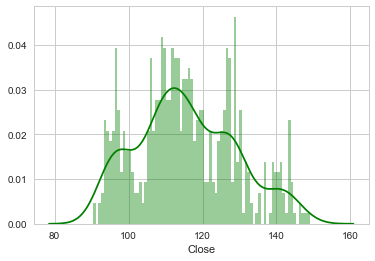

In [27]:
sns.distplot(AAPL['Close'].dropna(),bins=80,color='green')

In [79]:
rets['AMZN'].quantile(0.05)

-0.02151704576989118

In [80]:
days = 365
dt = 1/days
mu = rets.mean()['AMZN']
sigma = rets.std()['AMZN']

In [91]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    #shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in xrange(1,days):   
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x])) 
    return price    

In [1]:
start_price = 600.25

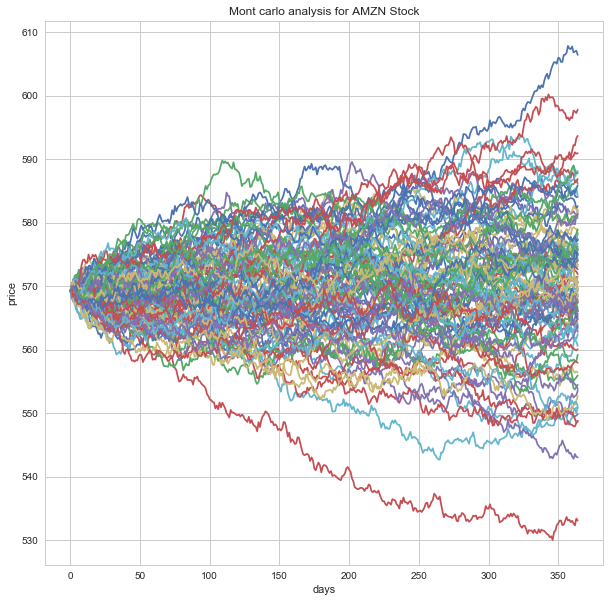

In [93]:
plt.figure(figsize=(10,10))
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel('days')
plt.ylabel('price')
plt.title('Mont carlo analysis for AMZN Stock')

